In [107]:
import pandas as pd
import numpy as np 
from github import Github
import getpass
from functools import reduce
import math
from operator import itemgetter, attrgetter
from matplotlib import pyplot as plt

In [108]:
# g = Github('WellersonPrenholato', getpass.getpass('Senha:'))

In [109]:
usedLanguages={}
for repo in g.get_user().get_repos():
    repoLangs = repo.get_languages()
    for lang in repoLangs:
        if lang in usedLanguages:
            usedLanguages[lang] += repoLangs[lang]
        else:
            usedLanguages[lang] = repoLangs[lang]

# print(usedLanguages)

In [110]:
# total = reduce(lambda x, value:x + value, usedLanguages.values(), 0)
# total

In [111]:
#Talvez transformar o valor incial encontrado em um dataframe e depois realizar os cálculos para mudança de porcentagem

In [112]:
conjLinguagens = [];
pesoLinguagens = [];
for linguagem, peso in zip(list(usedLanguages.keys()), list(usedLanguages.values())):
    conjLinguagens.append(linguagem)
    pesoLinguagens.append(peso)

In [113]:
armazena_data = {'Linguagens': conjLinguagens, 'Peso': pesoLinguagens};

In [114]:
#Transforma o conjunto de listas em um dataframe
data = pd.DataFrame(armazena_data)

In [115]:
#Gera o arquivo csv com apenas os atributos selecionados pela árvore de decisãob
data.to_csv('Linguagens.csv', encoding= 'ISO-8859-1', sep= ';', index=False)

In [116]:
data.sort_values(by=['Peso'], ascending=False, inplace=True)

In [117]:
# data.head(20)

In [118]:
data = data.drop(data[(data.Linguagens == 'HTML')].index)

In [119]:
data = data.drop(data[(data.Linguagens == 'CSS')].index)

In [120]:
data = data.drop(data[(data.Linguagens == 'Jupyter Notebook')].index)

In [121]:
data = data.drop(data[(data.Linguagens == 'PHP')].index)

In [122]:
#Gera o arquivo csv com apenas os atributos selecionados pela árvore de decisãob
data.to_csv('Linguagens.csv', encoding= 'ISO-8859-1', sep= ';', index=False)

In [123]:
data = pd.read_csv('Linguagens.csv', encoding='ISO-8859-1', sep=';')

In [124]:
qtdLanguages = 6
indices=[x for x in data.index if (x >= qtdLanguages)]
data.drop(indices, inplace=True)

In [125]:
data.head(20)

,Linguagens,Peso
0,Python,1914514
1,JavaScript,1653109
2,C,954738
3,TypeScript,248971
4,C++,159910
5,Java,147215


In [126]:
total = data['Peso'].sum()
# total = reduce(lambda x, value: x + value, data['Peso'], 0)
total

5078457

In [127]:
data['Peso'] = pd.to_numeric(data['Peso'], downcast='float')

In [128]:
data.dtypes

Linguagens     object
Peso          float32
dtype: object

In [129]:
# data['Peso'].sum()

In [130]:
for index, row in data.iterrows():
    data.at[index, 'Peso'] /= total
    data.at[index, 'Peso'] = round(data.at[index, 'Peso'] * 100, 3)
    print(data.at[index, 'Peso'])

37.699
32.551
18.8
4.902
3.149
2.899


In [131]:
#Verificação da porcentagem
data['Peso'].sum()

100.00001

In [132]:
data.head(10)

,Linguagens,Peso
0,Python,37.699001
1,JavaScript,32.550999
2,C,18.799999
3,TypeScript,4.902000
4,C++,3.149000
5,Java,2.899000


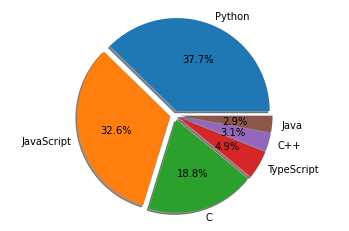

In [133]:
vendas = data['Peso']
labels = data['Linguagens']

# define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0.05, 0.05, 0.05, 0.05, 0.05 ,0.05) 

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(vendas, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)

# inseri a legenda e a localização da legenda.
# plt.legend(labels, loc=7)

# define que o gráfico será plotado em circulo
plt.axis('equal')

plt.savefig('linguages-statistics.png')
plt.show()

In [134]:
# total_acertos_por_questao = pd.DataFrame(matriz_acertos.sum())
# total_acertos_por_questao.reset_index(inplace=True)
# total_acertos_por_questao.columns = ['Questão', 'Número de Acertos']
# total_acertos_por_questao['Questão'] = total_acertos_por_questao['Questão'] + 1

# plt.figure(figsize=(18, 8))
# ax = sns.barplot(x='Questão', y='Número de Acertos', data=total_acertos_por_questao)

# ax.set_title('Linguagens', fontsize=16)

# plt.show()